## Importing the Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')


# Loading the Dataset

In [2]:
df = pd.read_csv('/kaggle/input/big-mart-sales-prediction/Train.csv')

## Basic Analysis

In [3]:
#Statistical Info 
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
# Datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
# Checking the unique values 
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

## Preprocessing 

In [7]:
# Check for categorical attributes 
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [8]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [9]:
# Print the categorical columns 
for col in cat_col: 
    print(col)
    print(df[col].value_counts())
    print()

Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Outlet_Size
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

Outlet_Location_Type
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

Outlet_Type
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2   

In [10]:
# fill the missing values 
item_weight_mean = df.pivot_table(values ='Item_Weight', index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [11]:
miss_bool = df["Item_Weight"].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [12]:
for i, item in enumerate(df['Outlet_Size']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df['Item_Identifier'][i] = item_weight_mean.loc[item]['Item_weight']
        else:
            df['Item_Weight'][i]=np.mean(df['Item_Weight'])

In [13]:
df['Item_Identifier'].isnull().sum()

0

In [14]:
Outlet_Size_mode = df.pivot_table(values ='Outlet_Size', columns = 'Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
Outlet_Size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [15]:
miss_bool = df['Outlet_Size'].isnull()
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: Outlet_Size_mode[x])

In [16]:
df['Outlet_Size'].isnull().sum()

0

In [17]:
sum(df['Item_Visibility']==0)

526

In [18]:
df.loc[:, 'Item_Visibility'].replace([0],[df['Item_Visibility'].mean()], inplace=True)

In [19]:
sum(df['Item_Visibility']==0)

0

In [20]:
# Combine item fat content 
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat',  'reg': 'Regular', 'low fat' : 'Low Fat' })
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

## Creating New Attributes 

In [21]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x : x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [22]:
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC': 'Non-Consumable', 'DR' : 'Drinks'})
df['New_Item_Type'].value_counts()

New_Item_Type
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

In [23]:
df.loc[df['New_Item_Type'] == 'Non-Consumable', 'Item_Fat_Content'] ='Non-Edible'
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: count, dtype: int64

In [24]:
#Creat small values of establishment year 
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']

In [25]:
df['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [26]:
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


## Exploratory Data Analysis 

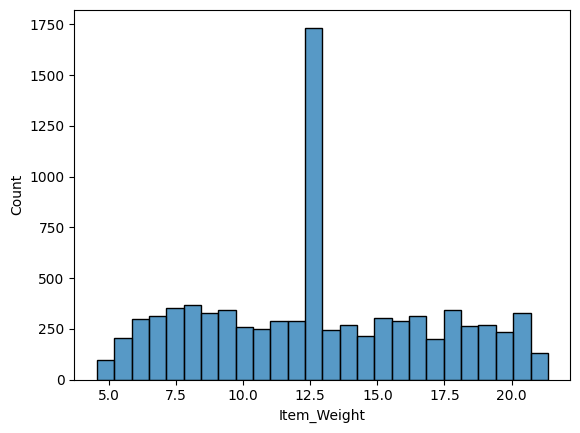

In [27]:
sns.histplot(df['Item_Weight'])

plt.show()

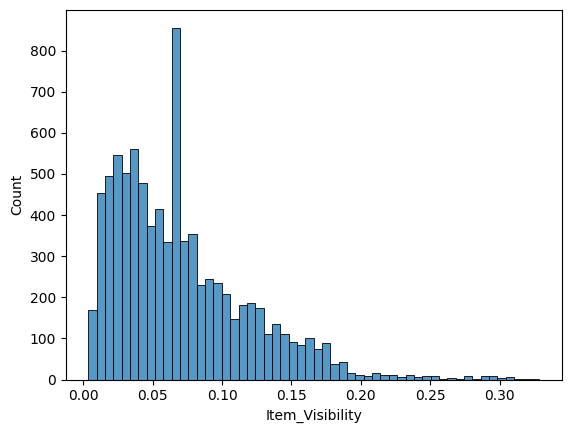

In [28]:
sns.histplot(df['Item_Visibility'])

plt.show()

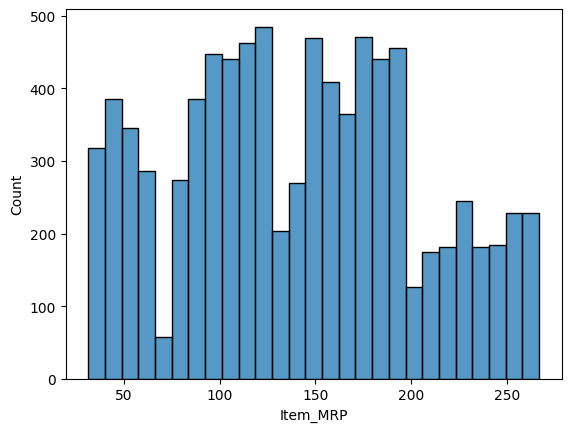

In [29]:
sns.histplot(df['Item_MRP'])

plt.show()

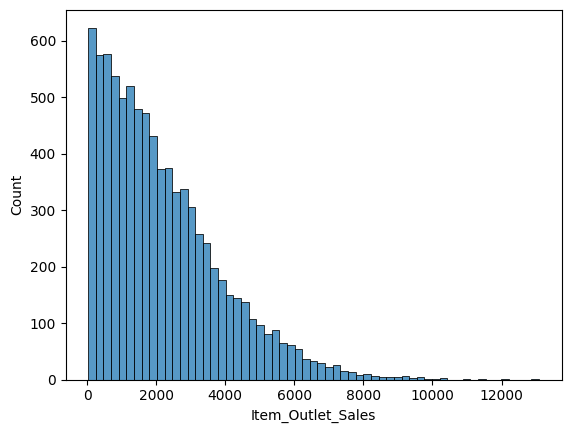

In [30]:
sns.histplot(df['Item_Outlet_Sales'])

plt.show()

In [31]:
# Log Transformation 
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])

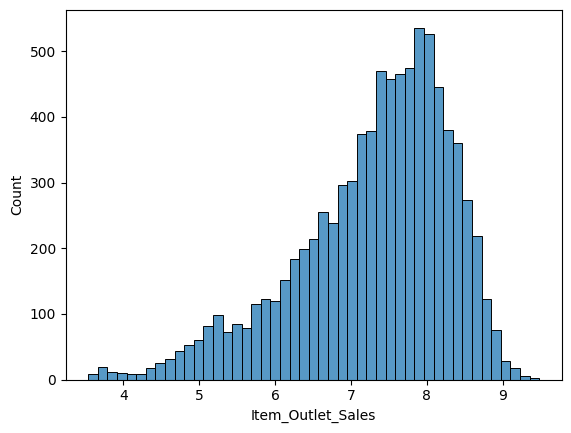

In [32]:
sns.histplot(df['Item_Outlet_Sales'])

plt.show()

In [33]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: count, dtype: int64

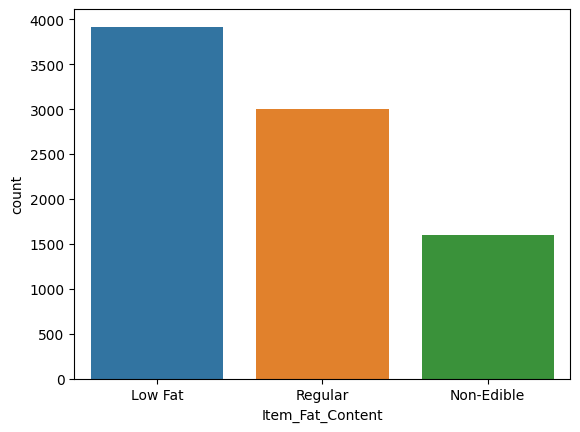

In [34]:
sns.countplot(x=df['Item_Fat_Content'])

plt.show()

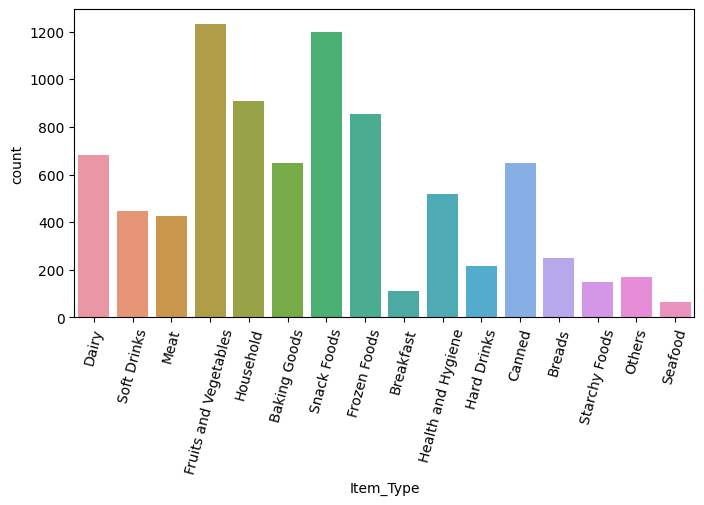

In [35]:
plt.figure(figsize=(8,4))
lable = (df['Item_Type'].unique())
chart = sns.countplot(x=df['Item_Type'])
chart.set_xticklabels(labels=lable, rotation = 75)
plt.show()

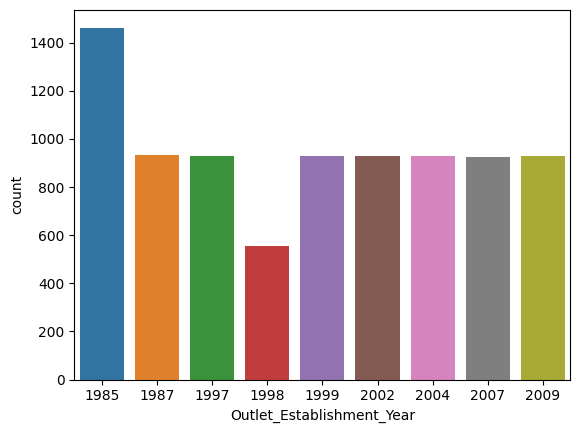

In [36]:
sns.countplot(x=df['Outlet_Establishment_Year'])

plt.show()

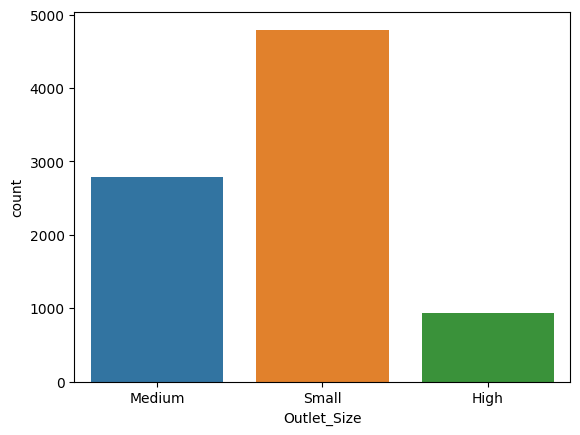

In [37]:
sns.countplot(x=df['Outlet_Size'])

plt.show()

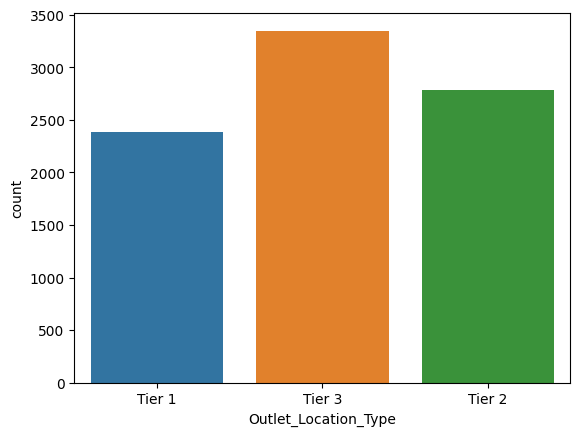

In [38]:
sns.countplot(x=df['Outlet_Location_Type'])

plt.show()

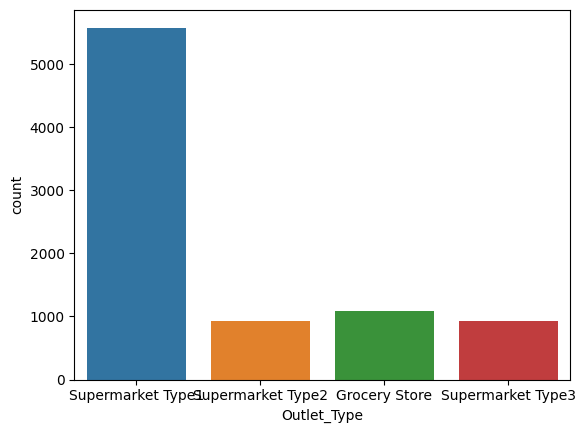

In [39]:
sns.countplot(x=df['Outlet_Type'])

plt.show()

## Coorelation Matrix

<Axes: >

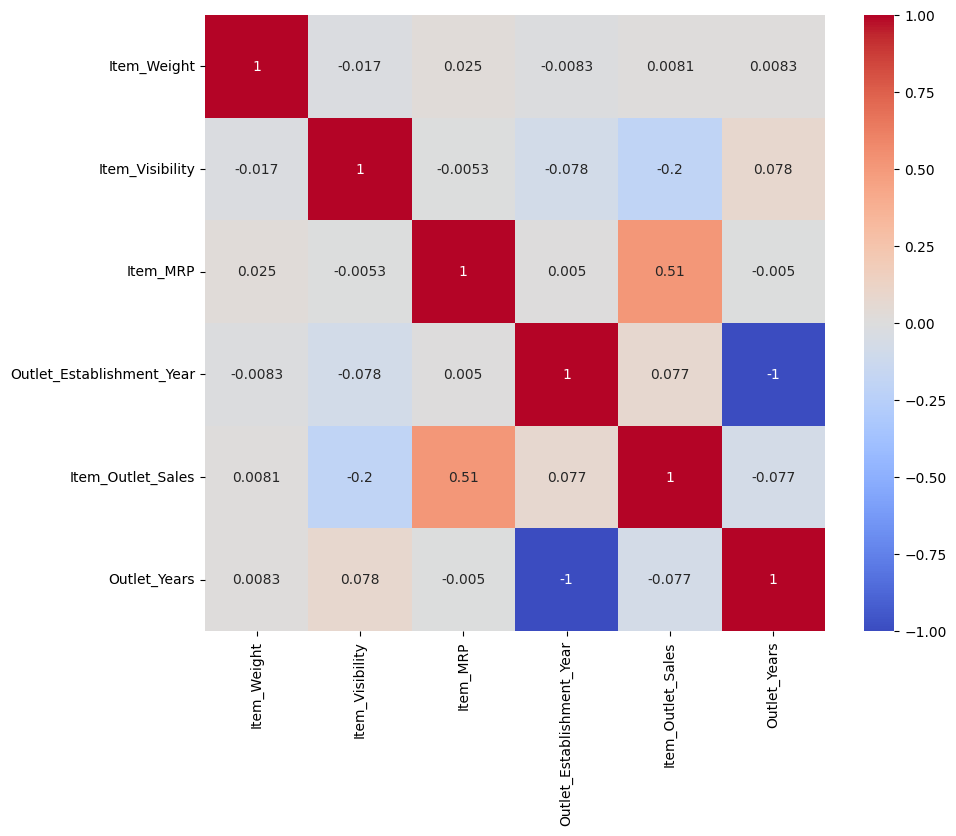

In [40]:
corr = df.corr(numeric_only = True)
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, annot=True, ax = ax, cmap = 'coolwarm')


In [41]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,26


## Lable Encoding 

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type', 'New_Item_Type' ]

for col in cat_col:
    df[col] = le.fit_transform(df[col])

## Onehot Encoding 

In [43]:
df =pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type', 'New_Item_Type' ])
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,14,9,...,True,False,False,False,True,False,False,False,True,False
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,4,3,...,False,False,True,False,False,True,False,True,False,False
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,14,9,...,True,False,False,False,True,False,False,False,True,False
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,15,0,...,False,False,True,True,False,False,False,False,True,False
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,26,1,...,False,False,True,False,True,False,False,False,False,True


## Input Split

In [44]:
X = df.drop(columns = ['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'  ])
y = df['Item_Outlet_Sales']




## Model Training 

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model 
    model.fit(X,y)

    # Test the model
    pred = model.predict(X)

    # Perfom corss-validation 
    cv_score = cross_val_score(model, X, y, scoring ='neg_mean_squared_error')
    cv_score =np.abs(np.mean(cv_score))
    print("Model Report")
    print("MSE", mean_squared_error(y, pred))
    print("CV Score", cv_score)

Model Report
MSE 0.2880065032501795
CV Score 0.2891182742641596


<Axes: title={'center': 'Model Coefficient'}>

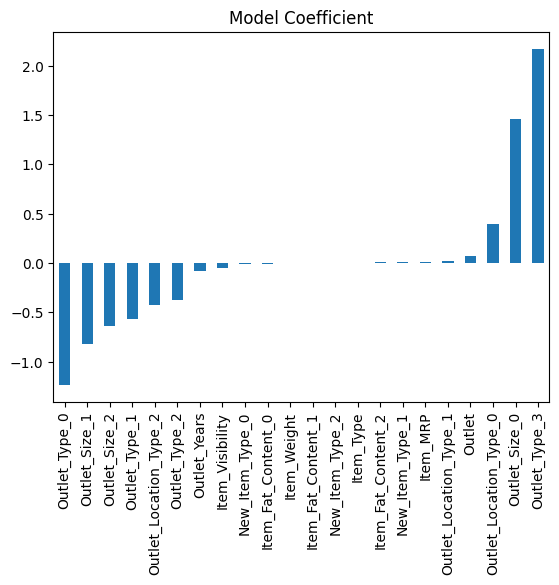

In [46]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression()
train(model,X,y)
coef =pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title = 'Model Coefficient')

Model Report
MSE 0.2881919345594855
CV Score 0.28930042565084735


<Axes: title={'center': 'Model Coefficient'}>

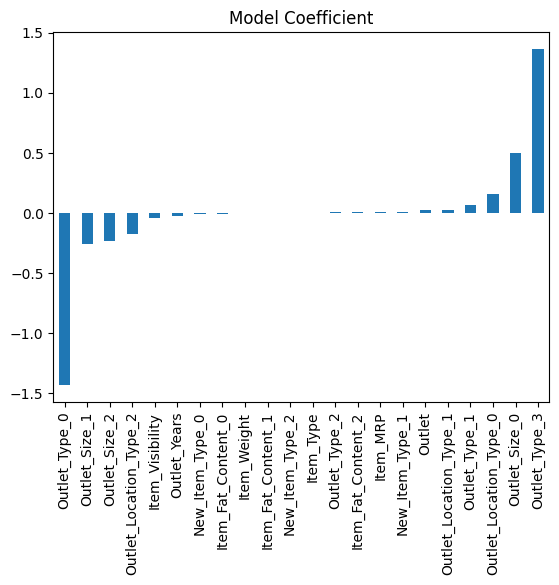

In [47]:
model = Ridge()
train(model,X,y)
coef =pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title = 'Model Coefficient')

Model Report
MSE 0.7628688679102087
CV Score 0.7630789166281843


<Axes: title={'center': 'Model Coefficient'}>

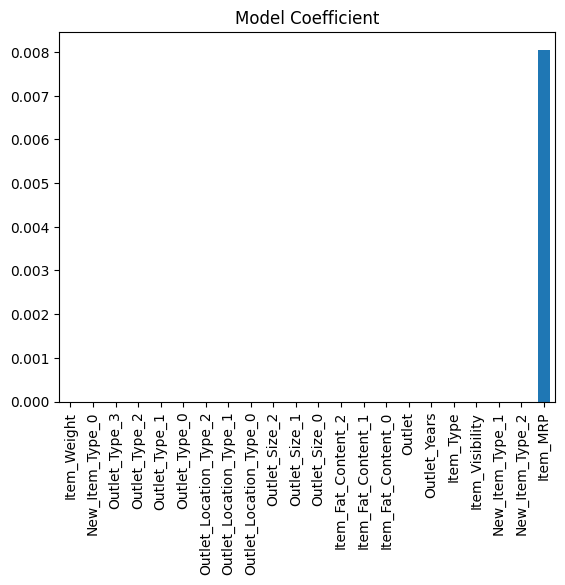

In [48]:
model = Lasso()
train(model,X,y)
coef =pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title = 'Model Coefficient')

Model Report
MSE 5.5534030638578795e-34
CV Score 0.5770398605252407


<Axes: title={'center': 'Feature Importance'}>

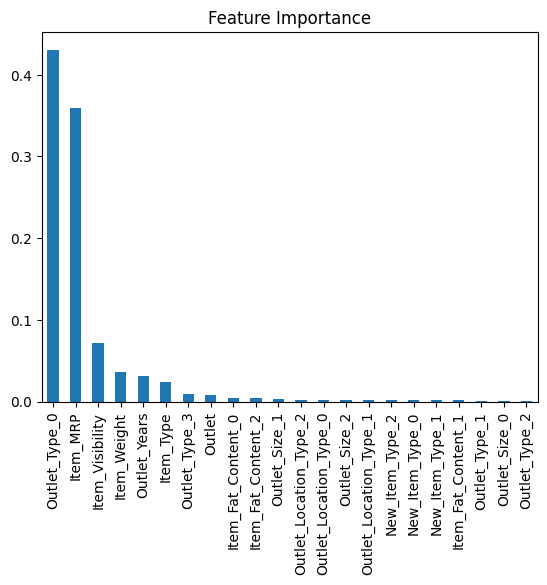

In [49]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model,X,y)
coef =pd.Series(model.feature_importances_, X.columns).sort_values(ascending= False)
coef.plot(kind='bar', title = 'Feature Importance')


Model Report
MSE 0.04229959221675665
CV Score 0.31008955084097495


<Axes: title={'center': 'Feature Importance'}>

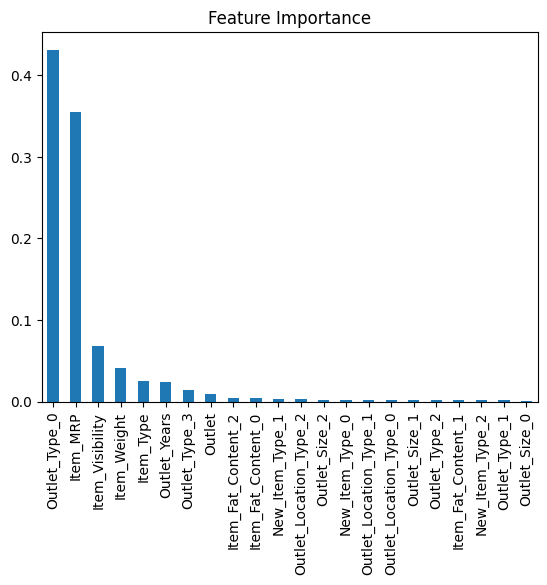

In [50]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model,X,y)
coef =pd.Series(model.feature_importances_, X.columns).sort_values(ascending= False)
coef.plot(kind='bar', title = 'Feature Importance')


Model Report
MSE 1.0418489584965893e-28
CV Score 0.332301344275294


<Axes: title={'center': 'Feature Importance'}>

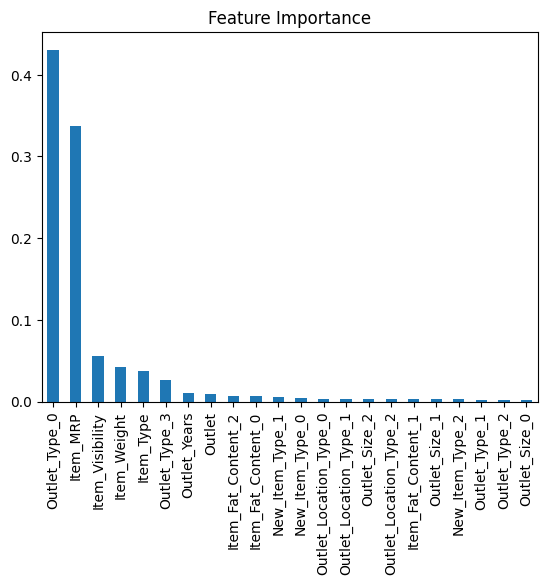

In [51]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model,X,y)
coef =pd.Series(model.feature_importances_, X.columns).sort_values(ascending= False)
coef.plot(kind='bar', title = 'Feature Importance')
